<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_study/blob/main/CH4_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH4_신경망 학습
> 여기서 학습은 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 손실함수를 소개한다. 이 손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다. 그럼으로 손실함수의 값을 작게 만드는 기법인 경사법을 소개한다.
- 손실함수
  - 오차제곱합
  - 교차엔트로피 오차

## 1. 손실함수

### 1) 오차제곱합
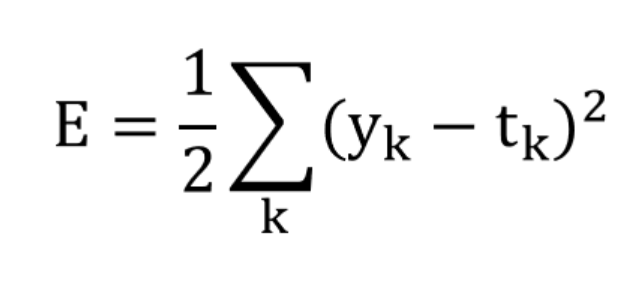

- yk는 신경망의 출력(신경망이 추정한 값)
- tk는 정답 레이블
- k는 데이터의 차원의 수
> 오차제곱합은 각 원소의 출력과 정답의 차를 제곱한 후 그 총합을 구한다.

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
import numpy as np
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [3]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0,  0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

### 2) 교차엔트로피

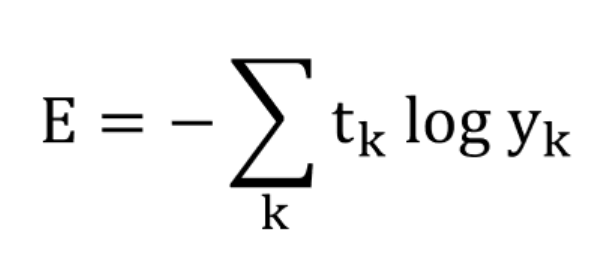

- log는 밑이 e인 자연로그(loge)이다.
- yk는 신경망의 출력
- tk는 정답 레이블이며 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다.(원핫인코딩)
> 실질적으로 정답일 때의 추정의 자연로그를 계산하는 식이 된다. 즉, 교체 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다. 좀 더 쉽게 말하면 정답일때의 출력이 작아질수록 오차는 커지게 된다.
> 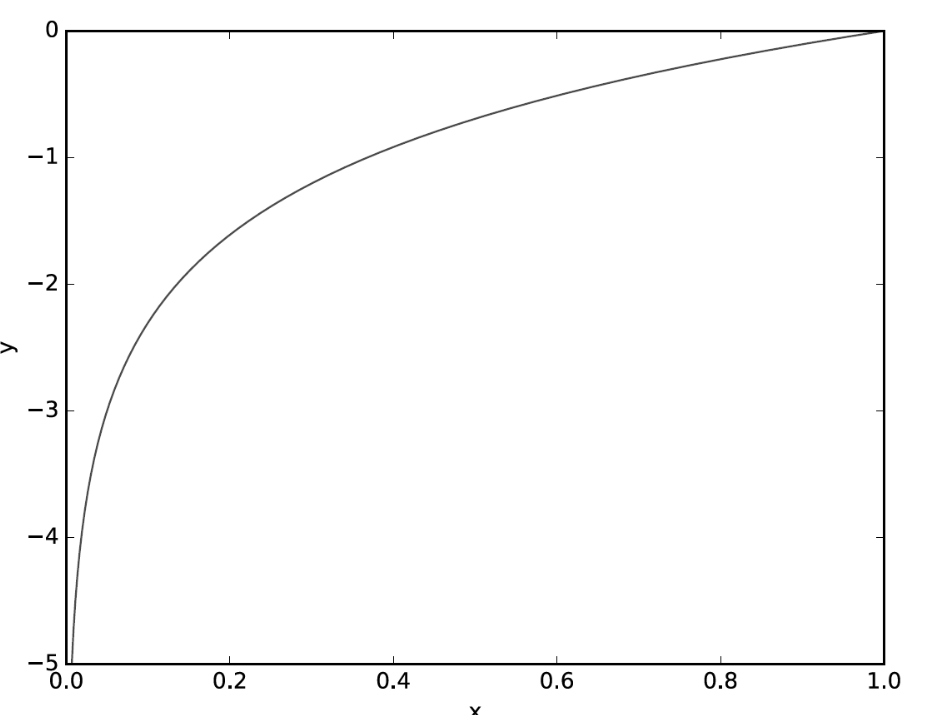

In [5]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 3) 미니배치학습
- 훈련 데이터가 10개 있으면 그로부터 계산한 100개의 손실함수 값들의 합을 지표로 삼는 것이다.

### 4) 배치용 교차엔트로피 오차 구현하기

##### 원-핫 인코딩 데이터(정답 레이블)

In [8]:
def cross_entropy_error(y, t): # y는 신경만 출력, t는 정답 레이블
  if y.ndim == 1: # y가 1차원이라면 즉, 데이터 하나당 교차 엔트로피 오차를 구하는 경우 reshape 함수로 데이터 형상을 ㅏㅂ꿔준다.
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size # 배치의 크기로 나눠 정규화하고 이미지 1장당 평균 교차 엔트로피 오차를 계산한다.

##### 숫자 레이블 

In [9]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

> 신경만 학습에서는 최적의 매개변수(가중치와 편향)를 참색할 때 손실함수의 값을 가능한 한 작게 하는 매겨밴수값을 찾는다. <br> 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다. <br> 만약 이 이분값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실함수의 값을 줄일 수 있다. 반대로 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변환시켜 손실함수의 값을 줄일 수 있다. 그러나 미분값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않고 갱신은 거기서 멈추게 된다.

> 정확도를 지표로 삼지 않는 이유는 미분값이 대부분 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다. 이유는 정확도가 50%라면 가중치 매개변수의 값을 조금 바꾼다고 해도 50% 그대로 유지된다. 즉 매개변수를 약간만 조정해서는 정확도가 개선도지 않고 일정하게 위지된다. 그리고 50%, 51%처럼 불연속적인 띄엄띄엄한 값으로 바뀌게 된다.

> 반대로 손시함수를 지표로 삼으면 매개변수의 값이 조금 변하면 그에 반응하여 손실 함수의 값도 연속적으로 변화한다. 어느 정소라도 기울기가 0이 되지 않는것이 신경망을 올바르게 학습할 수 있는 것이다.

## 2. 수치미분
> 경사법에서는 기울기 값을 기준으로 나아갈 방향을 정한다. 기울기란 무엇인지, 어떤 성질이 있는지 설명하고자 한다.

### 1) 미분
- 한순간의 변화량을 표시한 것이다. 
  - 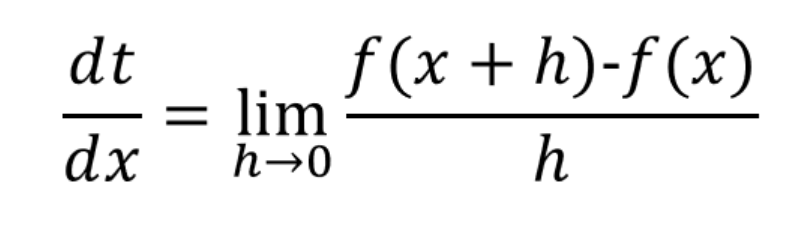

- 좌변은 f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호
- 결국, x의 작은변화가 함수 f(x)를 얼마나 변화시키느냐를 의미한ㄷ.
- 이때 시간의 작은 변화, 즉 시간을 뜻하는 h를 한없이 0에 가까벡 한다는 의미를 lim h->0으로 나타ㅐㄴ다.

In [10]:
# 나쁜 구현의 예
def numerical_diff(f, x):
  h = 1e-50
  return (f(x+h) - f(x))/h

In [11]:
np.float32(1e-50)

0.0

- 이 방식은 반올림 오차 문제를 일으킨다.
- 1e-4 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있다.
- 수치 미분에는 오차가 포함된다. 이 오차를 줄이기 위해(x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.
- 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심차분 혹은 중앙 차분이라고 한다. 
- (x+h) 와 x의 차분은 전방차분이라고 한다.

In [12]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h) # 차분식이다. 

In [13]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

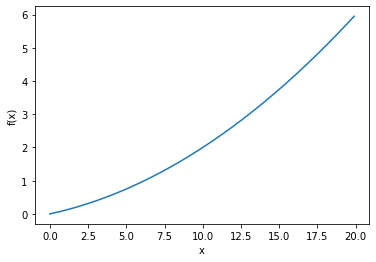

In [14]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [15]:
numerical_diff(function_1, 5)

0.1999999999990898

In [16]:
numerical_diff(function_1 ,10)

0.2999999999986347

- 미분값이 x에 대한 f(x)의 변화량이다.

### 2) 편미분
- 인수들의 제곱 합을 계산하는 단순한 식이다. 앞의 예와 달리 변수가 2개라는 점에 주의해야한다. 
- f(x0, x1) = x0^2 + xi^2
> 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.

In [17]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [18]:
# x0 = 3, x1=4일때, x0에 대한 편미분 af/af0를 구하라
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

In [19]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [20]:
# x0 = 3, x1 = 4일 때, x1에 대한 편미분 af/ax1를 구하라
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

In [21]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.
- 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

## 3.기울기
- 앞에서는 x0와 x1의 편미분을 변수별로 따로 계산했다. 이를 동시에 계산하고 싶다면 어떻게 해야할까?
- 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다.

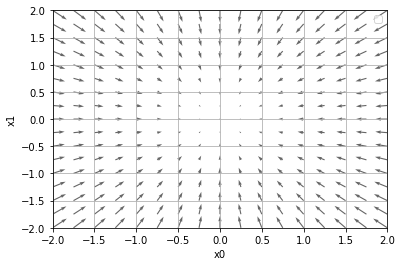

In [22]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


- 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

In [23]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [24]:
_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [25]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 1) 경사법
- 최적의 매개변수(가중치와 편향)를 학습시에 찾아야 한다. 여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다. 
- 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없다. 이런 상황에서 기울기를 잘 이용해서 함수의 최솟값을 찾으려는 것이 경사법이다.
- 그러나 실제로 복합한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다. 
  - 복잡하고 찌그러진 모양으 함수라면 평평한 곳에 파고들면서 고원이라 하는 학습이 진행되지 않는 저체기에 빠질 수 있다.

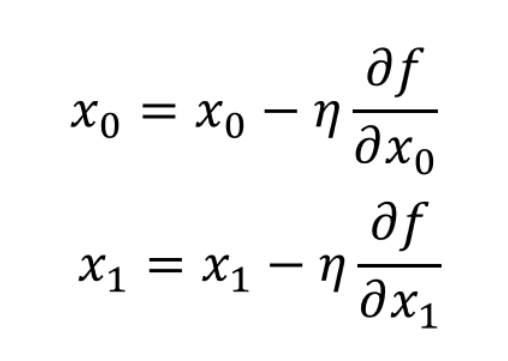

- eta(에타)는 갱신하는 양을 나타낸다. 이를 신경망 학습에서는 학습률(learning rate)이라고 한다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률이다.  
  - 찌그러진 함수에 고원에서 머무를 수 있기 때문이 이러한 것을 방지해준다.

In [26]:
def gradient_descent(f, init_x, lr=0.01, step_num=100): # x:최적화하려는 함수, init_x:초깃값, lr:learning rate, step_num:경사법에 따른 반복횟수
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f,x) # 함수의 기울기
    x -= lr * grad # 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복

  return x

In [27]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [28]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [29]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [30]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

- 학습률이 너무 크면 큰 값으로 발산한다.
- 학습률이 너무 작으면 거의 갱신되지 않은 채 끝난다.

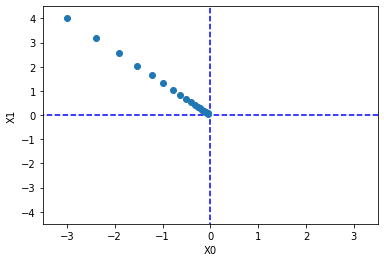

In [31]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


### 2) 신경망에서의 기울기
- 가중치 매개변수에 대한 손실 함수의 기울기이다.

In [32]:
import sys, os
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [33]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

In [34]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.21949336  0.2464875  -0.46598085]
 [ 0.32924004  0.36973124 -0.69897128]]


## 4. 학습 알고리즘 구현하기
- 전체
  - 신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 즉응하도록 조정하는 과정을 학습이라고 한다. 신경망 학습은 다음과 같은 4단계로 수행된다.
- 1단계 : 미니배치
  - 훈련 데이터중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표이다.
- 2단계 : 기울기 산출
  - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시한다.
- 3단계 : 매개변수 갱신
  - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
- 4단계 : 반복
  - 1~3 단계를 반복한다.

> 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법이라고 부른다. 대부분의 딥러닝 프레임워크에는 확률적 경사하강법의 영어 머리글자를 딴 SGD라는 함수로 이 기능을 구현하고 있다.

### 1) 2층 신경만 클래스 구현하기

In [35]:
import sys, os 
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥")
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    ### 가중치들을 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
    ### 입력값 x와 가중치들을 바탕으로 출력값을 반환
        a1 = np.dot(x, self.params['W1']) + self.params['b1']
        z1 = sigmoid(a1)
        a2 = np.dot(z1, self.params['W2'])  + self.params['b2']
        y = softmax(a2)
        return y
    def loss(self, x, t):
    ### 입력값 x를 통해 예측값을 계산하고
    ### 타깃값 t와의 오차를 계산함
        y = self.predict(x)
        loss = cross_entropy_error(y, t)
        return loss
    def accuracy(self, x, t):
    ### 입력값 x로 예측값을 계산하고
    ### 타깃값 t와 일치하는 케이스들의 비율을 계산해
    ### 정확도를 산출
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    def numerical_gradient(self, x, t):
    ### 손실함수를 정하고 
    ### 각 가중치에 대해 손실함수를 편미분하여 
    ### 그레디언트(gradient)를 계산 후 반환
        loss_w = lambda w : self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_w, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_w, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_w, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_w, self.params['b2'])
        return grads

### 2) 미니배치

In [ ]:
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 100 # 반복횟수 
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 사이즈
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch) 성능개선판

  # 매개변수 경신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

### 3) 시험데이터로 평가하기

In [ ]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파리머터
iters_num = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에 폭당 반복수 
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  # 미니배치 회득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.parmas[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print('train acc, test acc | ' + str(train_acc)+', '+str(test_acc))